<a href="https://colab.research.google.com/github/ckgupta21/machine-learning-mini-projects/blob/main/Project_Final_English_To_Assamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving english_to_assamese.txt to english_to_assamese.txt


In [ ]:
import pandas as pd
import numpy as np
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
import pickle as pkl

In [ ]:
import pandas as pd
lines = pd.read_table('english_to_assamese.txt', names=['eng','ass','extra'], quotechar='"', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156 entries, 0 to 4155
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   eng     4156 non-null   object
 1   ass     4154 non-null   object
 2   extra   4108 non-null   object
dtypes: object(3)
memory usage: 97.5+ KB


In [ ]:
lines

,eng,ass,extra
0,Hi.,নমস্কাৰ।,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
1,Hi.,হাই।,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
2,Run!,দৌৰ!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3,Run!,দৌৰাঁ!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
4,Run!,দৌৰক!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
...,...,...,...
4151,He has short hair.,তেওঁৰ চুলি চুটি।,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
4152,She has small feet.,তাইৰ সৰু ভৰি আছে।,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
4153,She has small feet.,তাইৰ সৰু ভৰি আছে।,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
4154,he has small feet.,তেওঁৰ সৰু ভৰি আছে।,CC-BY 2.0 (France) Attribution: tatoeba.org #3...


In [ ]:
lines.shape

(4156, 3)

In [ ]:
lines.drop("extra", 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
lines['ass']=lines['ass'].apply(str)

In [ ]:
lines

,eng,ass
0,Hi.,নমস্কাৰ।
1,Hi.,হাই।
2,Run!,দৌৰ!
3,Run!,দৌৰাঁ!
4,Run!,দৌৰক!
...,...,...
4151,He has short hair.,তেওঁৰ চুলি চুটি।
4152,She has small feet.,তাইৰ সৰু ভৰি আছে।
4153,She has small feet.,তাইৰ সৰু ভৰি আছে।
4154,he has small feet.,তেওঁৰ সৰু ভৰি আছে।


In [ ]:
# Lowercase all characters
lines.eng=lines.eng.apply(lambda x: x.lower())
lines.ass=lines.ass.apply(lambda x: x.lower())

# Remove quotes
lines.eng=lines.eng.apply(lambda x: re.sub("'", '', x))
lines.ass=lines.ass.apply(lambda x: re.sub("'", '', x))
exclude = set(string.punctuation) # Set of all special characters

# Remove all the special characters
lines.eng=lines.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.ass=lines.ass.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines.eng=lines.eng.apply(lambda x: x.translate(remove_digits))
lines.ass=lines.ass.apply(lambda x: x.translate(remove_digits))
lines.ass = lines.ass.apply(lambda x: re.sub("[(२३०८१५७९४६)]", "", x))

# Remove extra spaces
lines.eng=lines.eng.apply(lambda x: x.strip())
lines.ass=lines.ass.apply(lambda x: x.strip())
lines.eng=lines.eng.apply(lambda x: re.sub(" +", " ", x))
lines.ass=lines.ass.apply(lambda x: re.sub(" +", " ", x))

# Add start and end tokens to target sequences
lines.ass = lines.ass.apply(lambda x : 'START_ '+ x + ' _END')

In [ ]:
lines.sample(10)

,eng,ass
1788,theres something i forgot to tell you,START_ মই তোক কিবা এটা কবলৈ পাহৰিলোঁ। _END
1435,youre impatient arent you,START_ আপুনি অধৈৰ্য্য নহয় জানো _END
1594,we expect that tom will help us,START_ আমি আশা কৰোঁ যে টমে আমাক সহায় কৰিব। _END
1888,you never know when this might come in handy,START_ এইটো কেতিয়া কামত দিয়ে কব নোৱাৰি। _END
575,how can we kill time,START_ আমি কিদৰে সময় কটাব পাৰোঁ _END
3994,tom is an engineer,START_ টম এজন অভিযন্তা। _END
3413,dont tell me,START_ মোক নকবা। _END
4107,put it in the file,START_ ইয়াক ফাইলত ৰাখক। _END
803,he doesnt like coffee,START_ তেওঁ কফি ভাল নাপায়। _END
1329,dont you think thats weird,START_ আপুনি সেয়া আচৰিত বুলি ভাবে নেকি _END


In [ ]:
# Vocabulary of English
all_eng_words=set()
for e in lines.eng:
    for word in e.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

# Vocabulary of Assamese 
all_ass_words=set()
for a in lines.ass:
    for word in a.split():
        if word not in all_ass_words:
            all_ass_words.add(word)

In [ ]:
# Max Length of source sequence
lenght_list=[]
for l in lines.eng:
    lenght_list.append(len(l.split(' ')))
max_length_src = np.max(lenght_list)

# Max Length of target sequence
lenght_list=[]
for l in lines.ass:
    lenght_list.append(len(l.split(' ')))
max_length_tar = np.max(lenght_list)

In [ ]:
max_length_src

15

In [ ]:
max_length_tar

16

In [ ]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_ass_words))

# Calculate Vocab size for both source and target
num_encoder_tokens = len(all_eng_words)+1
num_decoder_tokens = len(all_ass_words)
num_encoder_tokens, num_decoder_tokens

(1729, 3142)

In [ ]:
num_decoder_tokens += 1 # For zero padding
num_decoder_tokens

3143

In [ ]:
# Create word to token dictionary for both source and target
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

# Create token to word dictionary for both source and target
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [ ]:
input_token_index

{'a': 1,
 'aah': 2,
 'able': 3,
 'aboard': 4,
 'about': 5,
 'above': 6,
 'abroad': 7,
 'absent': 8,
 'accept': 9,
 'accepted': 10,
 'accident': 11,
 'account': 12,
 'accustomed': 13,
 'aces': 14,
 'act': 15,
 'acting': 16,
 'active': 17,
 'actually': 18,
 'add': 19,
 'address': 20,
 'adjust': 21,
 'admissions': 22,
 'admit': 23,
 'admitted': 24,
 'advice': 25,
 'afford': 26,
 'afraid': 27,
 'africa': 28,
 'after': 29,
 'afternoon': 30,
 'again': 31,
 'against': 32,
 'age': 33,
 'ages': 34,
 'ago': 35,
 'ahead': 36,
 'air': 37,
 'airmail': 38,
 'alarm': 39,
 'alive': 40,
 'all': 41,
 'allergic': 42,
 'allowed': 43,
 'almost': 44,
 'alone': 45,
 'already': 46,
 'alright': 47,
 'also': 48,
 'altogether': 49,
 'always': 50,
 'am': 51,
 'american': 52,
 'among': 53,
 'amused': 54,
 'an': 55,
 'and': 56,
 'angry': 57,
 'annoyed': 58,
 'another': 59,
 'answer': 60,
 'answered': 61,
 'any': 62,
 'anybody': 63,
 'anymore': 64,
 'anyone': 65,
 'anything': 66,
 'apparent': 67,
 'applauded': 68,
 

In [ ]:
target_token_index

{'START_': 1,
 '_END': 2,
 'adjusting': 3,
 'attribution': 4,
 'aৰ': 5,
 'ccby': 6,
 'ck': 7,
 'cm': 8,
 'dejo': 9,
 'france': 10,
 'marshmallowcat': 11,
 'nan': 12,
 'oবোৰ': 13,
 'sabretou': 14,
 'sacredceltic': 15,
 'tatoebaorg': 16,
 '।': 17,
 'অংক': 18,
 'অংশগ্ৰহণ': 19,
 'অকণো': 20,
 'অকল': 21,
 'অকলশৰীয়া': 22,
 'অকলে': 23,
 'অক্টোবৰ': 24,
 'অক্ষম।': 25,
 'অক্ষৰ': 26,
 'অচেতন': 27,
 'অটিষ্টিক।': 28,
 'অট্টালিকাখন': 29,
 'অণুবীক্ষণ': 30,
 'অতি': 31,
 'অদ্ভুত': 32,
 'অদ্ভুত।': 33,
 'অধিক': 34,
 'অধিনায়ক।': 35,
 'অধৈৰ্য্য': 36,
 'অধ্যয়ন': 37,
 'অন': 38,
 'অনিচ্ছুক': 39,
 'অনুগ্ৰহ': 40,
 'অনুপস্থিত': 41,
 'অনুপ্ৰাণিত': 42,
 'অনুবাদ': 43,
 'অনুভৱ': 44,
 'অনুভৱৰ': 45,
 'অনুমতি': 46,
 'অনুসন্ধান': 47,
 'অনুসৰণ': 48,
 'অন্তিম': 49,
 'অন্তিমজন': 50,
 'অন্ধ': 51,
 'অন্ধ।': 52,
 'অপবিজ্ঞান।': 53,
 'অপমান': 54,
 'অপেক্ষা': 55,
 'অপ্ৰয়োজনীয়।': 56,
 'অফাৰটো': 57,
 'অফিচ': 58,
 'অবিশ্বাস্য': 59,
 'অবিশ্বাস্য।': 60,
 'অবিহনে': 61,
 'অবৈধ': 62,
 'অভদ্ৰ।': 63,
 'অভিকেন্দ্ৰ': 64,
 'অভিজ্ঞতা': 65

In [ ]:
reverse_input_char_index

{1: 'a',
 2: 'aah',
 3: 'able',
 4: 'aboard',
 5: 'about',
 6: 'above',
 7: 'abroad',
 8: 'absent',
 9: 'accept',
 10: 'accepted',
 11: 'accident',
 12: 'account',
 13: 'accustomed',
 14: 'aces',
 15: 'act',
 16: 'acting',
 17: 'active',
 18: 'actually',
 19: 'add',
 20: 'address',
 21: 'adjust',
 22: 'admissions',
 23: 'admit',
 24: 'admitted',
 25: 'advice',
 26: 'afford',
 27: 'afraid',
 28: 'africa',
 29: 'after',
 30: 'afternoon',
 31: 'again',
 32: 'against',
 33: 'age',
 34: 'ages',
 35: 'ago',
 36: 'ahead',
 37: 'air',
 38: 'airmail',
 39: 'alarm',
 40: 'alive',
 41: 'all',
 42: 'allergic',
 43: 'allowed',
 44: 'almost',
 45: 'alone',
 46: 'already',
 47: 'alright',
 48: 'also',
 49: 'altogether',
 50: 'always',
 51: 'am',
 52: 'american',
 53: 'among',
 54: 'amused',
 55: 'an',
 56: 'and',
 57: 'angry',
 58: 'annoyed',
 59: 'another',
 60: 'answer',
 61: 'answered',
 62: 'any',
 63: 'anybody',
 64: 'anymore',
 65: 'anyone',
 66: 'anything',
 67: 'apparent',
 68: 'applauded',
 

In [ ]:
reverse_target_char_index

{1: 'START_',
 2: '_END',
 3: 'adjusting',
 4: 'attribution',
 5: 'aৰ',
 6: 'ccby',
 7: 'ck',
 8: 'cm',
 9: 'dejo',
 10: 'france',
 11: 'marshmallowcat',
 12: 'nan',
 13: 'oবোৰ',
 14: 'sabretou',
 15: 'sacredceltic',
 16: 'tatoebaorg',
 17: '।',
 18: 'অংক',
 19: 'অংশগ্ৰহণ',
 20: 'অকণো',
 21: 'অকল',
 22: 'অকলশৰীয়া',
 23: 'অকলে',
 24: 'অক্টোবৰ',
 25: 'অক্ষম।',
 26: 'অক্ষৰ',
 27: 'অচেতন',
 28: 'অটিষ্টিক।',
 29: 'অট্টালিকাখন',
 30: 'অণুবীক্ষণ',
 31: 'অতি',
 32: 'অদ্ভুত',
 33: 'অদ্ভুত।',
 34: 'অধিক',
 35: 'অধিনায়ক।',
 36: 'অধৈৰ্য্য',
 37: 'অধ্যয়ন',
 38: 'অন',
 39: 'অনিচ্ছুক',
 40: 'অনুগ্ৰহ',
 41: 'অনুপস্থিত',
 42: 'অনুপ্ৰাণিত',
 43: 'অনুবাদ',
 44: 'অনুভৱ',
 45: 'অনুভৱৰ',
 46: 'অনুমতি',
 47: 'অনুসন্ধান',
 48: 'অনুসৰণ',
 49: 'অন্তিম',
 50: 'অন্তিমজন',
 51: 'অন্ধ',
 52: 'অন্ধ।',
 53: 'অপবিজ্ঞান।',
 54: 'অপমান',
 55: 'অপেক্ষা',
 56: 'অপ্ৰয়োজনীয়।',
 57: 'অফাৰটো',
 58: 'অফিচ',
 59: 'অবিশ্বাস্য',
 60: 'অবিশ্বাস্য।',
 61: 'অবিহনে',
 62: 'অবৈধ',
 63: 'অভদ্ৰ।',
 64: 'অভিকেন্দ্ৰ',
 65: 'অভিজ্ঞতা'

In [ ]:
lines = shuffle(lines)
lines.head(10)

,eng,ass
2494,memorize it,START_ ইয়াক মনত ৰাখিব। _END
2845,i can fix it,START_ মই ইয়াক ঠিক কৰিব পাৰো। _END
2715,you keep it,START_ আপুনি ইয়াক ৰাখক। _END
1582,tom seemed to be in good health,START_ টমক সুস্বাস্থ্যত থকা যেন লাগিছিল৷ _END
346,i dreamt about you,START_ মই তোমাৰ সপোন চাইছোঁ। _END
3088,take me home,START_ মোক ঘৰলৈ লৈ যাওক। _END
3217,we got ready,START_ আমি সাজু হলো। _END
827,lets see what happens,START_ চাওঁ কি হয়। _END
2522,she hit him,START_ তাই তাক মাৰিলে। _END
1429,you know thats not possible,START_ তুমি জানানে যে সেয়া সম্ভৱ নহয়। _END


In [ ]:
# Train - Test Split
X, y = lines.eng, lines.ass
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((3324,), (832,))

In [ ]:
X_train

1291    tom wont do the same thing
2162                     i can run
2531                   take a bath
3330                  you look fat
2253                     she walks
                   ...            
2424                   is tom here
3200                  wait for tom
3987            tom is a socialist
4069                  my wife died
540            you may go home now
Name: eng, Length: 3324, dtype: object

In [ ]:
y_train

1291              START_ টমে একে কাম নকৰে। _END
2162                 START_ মই দৌৰিব পাৰো। _END
2531                        START_ গা ধুব। _END
3330            START_ আপোনাক শকত দেখাইছে। _END
2253                 START_ তাই খোজ কাঢ়ে। _END
                         ...                   
2424                 START_ টম ইয়াত আছেনে _END
3200          START_ টমৰ বাবে অপেক্ষা কৰক। _END
3987          START_ টম এজন সমাজতান্ত্ৰিক। _END
4069                            START_ nan _END
540     START_ আপুনি এতিয়া ঘৰলৈ যাব পাৰে। _END
Name: ass, Length: 3324, dtype: object

In [ ]:
X_test

1444         adjust the microscopes focus
3595                    im ready to start
1343         i just spoke with the police
3                                     run
2138                            grab that
                      ...                
2612                           toms tired
3197                         unbelievable
427                    why are you in bed
2148                             hes mine
1756    can you wait until this afternoon
Name: eng, Length: 832, dtype: object

In [ ]:
y_test

1444                START_ মাইক্ৰস্কপৰ ফকাছ মিলাওঁক। _END
3595                    START_ মই আৰম্ভ কৰিবলৈ সাজু। _END
1343       START_ মই এইমাত্ৰ পুলিচৰ লগত কথা পাতিলোঁ। _END
3                                       START_ দৌৰাঁ _END
2138                               START_ সেইটো ধৰক। _END
                              ...                        
2612                          START_ টম ভাগৰি পৰিছে। _END
3197                               START_ অবিশ্বাস্য _END
427                          START_ তুমি বিছনাত কিয় _END
2148                                  START_ সি মোৰ। _END
1756    START_ আপুনি আজি দুপৰীয়া লৈকে অপেক্ষা কৰিবনে ...
Name: ass, Length: 832, dtype: object

In [ ]:
with open('Weights_Mar_X_train', 'wb') as file_pi:
  pkl.dump(X_train.to_pickle, file_pi)
with open('Weights_Mar_X_test', 'wb') as file_pi:
  pkl.dump(X_test.to_pickle, file_pi)

In [ ]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [ ]:
latent_dim = 256

In [ ]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [ ]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)

# Use a softmax to generate a probability distribution over the target vocabulary for each time step
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
len(X_test)

832

In [ ]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 70

In [ ]:
from keras.callbacks import ModelCheckpoint
filename = 'model.NLP'
checkpoint = ModelCheckpoint(filename, monitor='loss', verbose=1, mode='min')

In [ ]:
history=model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    callbacks=[checkpoint],
                    validation_steps = val_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/70
25/25 [==============================] - ETA: 0s - loss: 1.9500 - accuracy: 0.2042
Epoch 1: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 66s 2s/step - loss: 1.9500 - accuracy: 0.2042 - val_loss: 1.7777 - val_accuracy: 0.2335
Epoch 2/70
25/25 [==============================] - ETA: 0s - loss: 1.6523 - accuracy: 0.2365
Epoch 2: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 1.6523 - accuracy: 0.2365 - val_loss: 1.7184 - val_accuracy: 0.2393
Epoch 3/70
25/25 [==============================] - ETA: 0s - loss: 1.5883 - accuracy: 0.2393
Epoch 3: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 1.5883 - accuracy: 0.2393 - val_loss: 1.6900 - val_accuracy: 0.2411
Epoch 4/70
25/25 [==============================] - ETA: 0s - loss: 1.5306 - accuracy: 0.2417
Epoch 4: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 1.5306 - accuracy: 0.2417 - val_loss: 1.6647 - val_accuracy: 0.2440
Epoch 5/70
25/25 [==============================] - ETA: 0s - loss: 1.4721 - accuracy: 0.2520
Epoch 5: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 1.4721 - accuracy: 0.2520 - val_loss: 1.6378 - val_accuracy: 0.2547
Epoch 6/70
25/25 [==============================] - ETA: 0s - loss: 1.4173 - accuracy: 0.2632
Epoch 6: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 1.4173 - accuracy: 0.2632 - val_loss: 1.6219 - val_accuracy: 0.2586
Epoch 7/70
25/25 [==============================] - ETA: 0s - loss: 1.3594 - accuracy: 0.2771
Epoch 7: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 1.3594 - accuracy: 0.2771 - val_loss: 1.5982 - val_accuracy: 0.2801
Epoch 8/70
25/25 [==============================] - ETA: 0s - loss: 1.3158 - accuracy: 0.2897
Epoch 8: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 1.3158 - accuracy: 0.2897 - val_loss: 1.5810 - val_accuracy: 0.2843
Epoch 9/70
25/25 [==============================] - ETA: 0s - loss: 1.2773 - accuracy: 0.3027
Epoch 9: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 1.2773 - accuracy: 0.3027 - val_loss: 1.5652 - val_accuracy: 0.2963
Epoch 10/70
25/25 [==============================] - ETA: 0s - loss: 1.2273 - accuracy: 0.3183
Epoch 10: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 1.2273 - accuracy: 0.3183 - val_loss: 1.5569 - val_accuracy: 0.3044
Epoch 11/70
25/25 [==============================] - ETA: 0s - loss: 1.1830 - accuracy: 0.3329
Epoch 11: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 1.1830 - accuracy: 0.3329 - val_loss: 1.5379 - val_accuracy: 0.3117
Epoch 12/70
25/25 [==============================] - ETA: 0s - loss: 1.1427 - accuracy: 0.3466
Epoch 12: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 1.1427 - accuracy: 0.3466 - val_loss: 1.5183 - val_accuracy: 0.3211
Epoch 13/70
25/25 [==============================] - ETA: 0s - loss: 1.1014 - accuracy: 0.3599
Epoch 13: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 1.1014 - accuracy: 0.3599 - val_loss: 1.5116 - val_accuracy: 0.3269
Epoch 14/70
25/25 [==============================] - ETA: 0s - loss: 1.0592 - accuracy: 0.3731
Epoch 14: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 1.0592 - accuracy: 0.3731 - val_loss: 1.4884 - val_accuracy: 0.3337
Epoch 15/70
25/25 [==============================] - ETA: 0s - loss: 1.0173 - accuracy: 0.3872
Epoch 15: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 1.0173 - accuracy: 0.3872 - val_loss: 1.4655 - val_accuracy: 0.3454
Epoch 16/70
25/25 [==============================] - ETA: 0s - loss: 0.9826 - accuracy: 0.4018
Epoch 16: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 0.9826 - accuracy: 0.4018 - val_loss: 1.4536 - val_accuracy: 0.3494
Epoch 17/70
25/25 [==============================] - ETA: 0s - loss: 0.9454 - accuracy: 0.4133
Epoch 17: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 0.9454 - accuracy: 0.4133 - val_loss: 1.4444 - val_accuracy: 0.3520
Epoch 18/70
25/25 [==============================] - ETA: 0s - loss: 0.9115 - accuracy: 0.4286
Epoch 18: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 53s 2s/step - loss: 0.9115 - accuracy: 0.4286 - val_loss: 1.4223 - val_accuracy: 0.3640
Epoch 19/70
25/25 [==============================] - ETA: 0s - loss: 0.8734 - accuracy: 0.4446
Epoch 19: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 0.8734 - accuracy: 0.4446 - val_loss: 1.4115 - val_accuracy: 0.3695
Epoch 20/70
25/25 [==============================] - ETA: 0s - loss: 0.8389 - accuracy: 0.4619
Epoch 20: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 0.8389 - accuracy: 0.4619 - val_loss: 1.3966 - val_accuracy: 0.3792
Epoch 21/70
25/25 [==============================] - ETA: 0s - loss: 0.8056 - accuracy: 0.4788
Epoch 21: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 0.8056 - accuracy: 0.4788 - val_loss: 1.3884 - val_accuracy: 0.3855
Epoch 22/70
25/25 [==============================] - ETA: 0s - loss: 0.7741 - accuracy: 0.4934
Epoch 22: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 0.7741 - accuracy: 0.4934 - val_loss: 1.3832 - val_accuracy: 0.3857
Epoch 23/70
25/25 [==============================] - ETA: 0s - loss: 0.7448 - accuracy: 0.5120
Epoch 23: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 49s 2s/step - loss: 0.7448 - accuracy: 0.5120 - val_loss: 1.3749 - val_accuracy: 0.3959
Epoch 24/70
25/25 [==============================] - ETA: 0s - loss: 0.7139 - accuracy: 0.5290
Epoch 24: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 0.7139 - accuracy: 0.5290 - val_loss: 1.3662 - val_accuracy: 0.4059
Epoch 25/70
25/25 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.5501
Epoch 25: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 0.6796 - accuracy: 0.5501 - val_loss: 1.3571 - val_accuracy: 0.4134
Epoch 26/70
25/25 [==============================] - ETA: 0s - loss: 0.6517 - accuracy: 0.5672
Epoch 26: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 49s 2s/step - loss: 0.6517 - accuracy: 0.5672 - val_loss: 1.3462 - val_accuracy: 0.4184
Epoch 27/70
25/25 [==============================] - ETA: 0s - loss: 0.6217 - accuracy: 0.5904
Epoch 27: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 0.6217 - accuracy: 0.5904 - val_loss: 1.3406 - val_accuracy: 0.4221
Epoch 28/70
25/25 [==============================] - ETA: 0s - loss: 0.5934 - accuracy: 0.6062
Epoch 28: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 0.5934 - accuracy: 0.6062 - val_loss: 1.3279 - val_accuracy: 0.4357
Epoch 29/70
25/25 [==============================] - ETA: 0s - loss: 0.5670 - accuracy: 0.6259
Epoch 29: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 49s 2s/step - loss: 0.5670 - accuracy: 0.6259 - val_loss: 1.3144 - val_accuracy: 0.4508
Epoch 30/70
25/25 [==============================] - ETA: 0s - loss: 0.5393 - accuracy: 0.6443
Epoch 30: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 0.5393 - accuracy: 0.6443 - val_loss: 1.3080 - val_accuracy: 0.4545
Epoch 31/70
25/25 [==============================] - ETA: 0s - loss: 0.5144 - accuracy: 0.6620
Epoch 31: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 49s 2s/step - loss: 0.5144 - accuracy: 0.6620 - val_loss: 1.2921 - val_accuracy: 0.4600
Epoch 32/70
25/25 [==============================] - ETA: 0s - loss: 0.4906 - accuracy: 0.6799
Epoch 32: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 0.4906 - accuracy: 0.6799 - val_loss: 1.2880 - val_accuracy: 0.4671
Epoch 33/70
25/25 [==============================] - ETA: 0s - loss: 0.4641 - accuracy: 0.6935
Epoch 33: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 48s 2s/step - loss: 0.4641 - accuracy: 0.6935 - val_loss: 1.2817 - val_accuracy: 0.4715
Epoch 34/70
25/25 [==============================] - ETA: 0s - loss: 0.4396 - accuracy: 0.7153
Epoch 34: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 49s 2s/step - loss: 0.4396 - accuracy: 0.7153 - val_loss: 1.2763 - val_accuracy: 0.4772
Epoch 35/70
25/25 [==============================] - ETA: 0s - loss: 0.4201 - accuracy: 0.7260
Epoch 35: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 49s 2s/step - loss: 0.4201 - accuracy: 0.7260 - val_loss: 1.2716 - val_accuracy: 0.4846
Epoch 36/70
25/25 [==============================] - ETA: 0s - loss: 0.3954 - accuracy: 0.7451
Epoch 36: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 48s 2s/step - loss: 0.3954 - accuracy: 0.7451 - val_loss: 1.2683 - val_accuracy: 0.4890
Epoch 37/70
25/25 [==============================] - ETA: 0s - loss: 0.3756 - accuracy: 0.7592
Epoch 37: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 0.3756 - accuracy: 0.7592 - val_loss: 1.2598 - val_accuracy: 0.5003
Epoch 38/70
25/25 [==============================] - ETA: 0s - loss: 0.3544 - accuracy: 0.7748
Epoch 38: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 48s 2s/step - loss: 0.3544 - accuracy: 0.7748 - val_loss: 1.2460 - val_accuracy: 0.5044
Epoch 39/70
25/25 [==============================] - ETA: 0s - loss: 0.3354 - accuracy: 0.7910
Epoch 39: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 48s 2s/step - loss: 0.3354 - accuracy: 0.7910 - val_loss: 1.2435 - val_accuracy: 0.5133
Epoch 40/70
25/25 [==============================] - ETA: 0s - loss: 0.3158 - accuracy: 0.8040
Epoch 40: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 46s 2s/step - loss: 0.3158 - accuracy: 0.8040 - val_loss: 1.2339 - val_accuracy: 0.5230
Epoch 41/70
25/25 [==============================] - ETA: 0s - loss: 0.2977 - accuracy: 0.8155
Epoch 41: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 48s 2s/step - loss: 0.2977 - accuracy: 0.8155 - val_loss: 1.2188 - val_accuracy: 0.5301
Epoch 42/70
25/25 [==============================] - ETA: 0s - loss: 0.2818 - accuracy: 0.8274
Epoch 42: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 48s 2s/step - loss: 0.2818 - accuracy: 0.8274 - val_loss: 1.2158 - val_accuracy: 0.5288
Epoch 43/70
25/25 [==============================] - ETA: 0s - loss: 0.2639 - accuracy: 0.8395
Epoch 43: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 49s 2s/step - loss: 0.2639 - accuracy: 0.8395 - val_loss: 1.2128 - val_accuracy: 0.5400
Epoch 44/70
25/25 [==============================] - ETA: 0s - loss: 0.2491 - accuracy: 0.8504
Epoch 44: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 49s 2s/step - loss: 0.2491 - accuracy: 0.8504 - val_loss: 1.2152 - val_accuracy: 0.5484
Epoch 45/70
25/25 [==============================] - ETA: 0s - loss: 0.2337 - accuracy: 0.8602
Epoch 45: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 49s 2s/step - loss: 0.2337 - accuracy: 0.8602 - val_loss: 1.2033 - val_accuracy: 0.5573
Epoch 46/70
25/25 [==============================] - ETA: 0s - loss: 0.2190 - accuracy: 0.8721
Epoch 46: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 50s 2s/step - loss: 0.2190 - accuracy: 0.8721 - val_loss: 1.1949 - val_accuracy: 0.5591
Epoch 47/70
25/25 [==============================] - ETA: 0s - loss: 0.2071 - accuracy: 0.8778
Epoch 47: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 0.2071 - accuracy: 0.8778 - val_loss: 1.1931 - val_accuracy: 0.5649
Epoch 48/70
25/25 [==============================] - ETA: 0s - loss: 0.1945 - accuracy: 0.8884
Epoch 48: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 0.1945 - accuracy: 0.8884 - val_loss: 1.1923 - val_accuracy: 0.5628
Epoch 49/70
25/25 [==============================] - ETA: 0s - loss: 0.1821 - accuracy: 0.8953
Epoch 49: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 0.1821 - accuracy: 0.8953 - val_loss: 1.1943 - val_accuracy: 0.5675
Epoch 50/70
25/25 [==============================] - ETA: 0s - loss: 0.1724 - accuracy: 0.9011
Epoch 50: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 0.1724 - accuracy: 0.9011 - val_loss: 1.1916 - val_accuracy: 0.5714
Epoch 51/70
25/25 [==============================] - ETA: 0s - loss: 0.1590 - accuracy: 0.9082
Epoch 51: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 55s 2s/step - loss: 0.1590 - accuracy: 0.9082 - val_loss: 1.2014 - val_accuracy: 0.5724
Epoch 52/70
25/25 [==============================] - ETA: 0s - loss: 0.1505 - accuracy: 0.9127
Epoch 52: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 0.1505 - accuracy: 0.9127 - val_loss: 1.2012 - val_accuracy: 0.5758
Epoch 53/70
25/25 [==============================] - ETA: 0s - loss: 0.1396 - accuracy: 0.9182
Epoch 53: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 58s 2s/step - loss: 0.1396 - accuracy: 0.9182 - val_loss: 1.2039 - val_accuracy: 0.5761
Epoch 54/70
25/25 [==============================] - ETA: 0s - loss: 0.1303 - accuracy: 0.9227
Epoch 54: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 61s 2s/step - loss: 0.1303 - accuracy: 0.9227 - val_loss: 1.2049 - val_accuracy: 0.5774
Epoch 55/70
25/25 [==============================] - ETA: 0s - loss: 0.1230 - accuracy: 0.9271
Epoch 55: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 58s 2s/step - loss: 0.1230 - accuracy: 0.9271 - val_loss: 1.1985 - val_accuracy: 0.5798
Epoch 56/70
25/25 [==============================] - ETA: 0s - loss: 0.1142 - accuracy: 0.9302
Epoch 56: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 57s 2s/step - loss: 0.1142 - accuracy: 0.9302 - val_loss: 1.1882 - val_accuracy: 0.5842
Epoch 57/70
25/25 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.9338
Epoch 57: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 53s 2s/step - loss: 0.1071 - accuracy: 0.9338 - val_loss: 1.1903 - val_accuracy: 0.5853
Epoch 58/70
25/25 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9372
Epoch 58: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 0.1007 - accuracy: 0.9372 - val_loss: 1.1896 - val_accuracy: 0.5850
Epoch 59/70
25/25 [==============================] - ETA: 0s - loss: 0.0925 - accuracy: 0.9418
Epoch 59: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 0.0925 - accuracy: 0.9418 - val_loss: 1.1851 - val_accuracy: 0.5894
Epoch 60/70
25/25 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9438
Epoch 60: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 53s 2s/step - loss: 0.0878 - accuracy: 0.9438 - val_loss: 1.1895 - val_accuracy: 0.5907
Epoch 61/70
25/25 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.9461
Epoch 61: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 56s 2s/step - loss: 0.0826 - accuracy: 0.9461 - val_loss: 1.1943 - val_accuracy: 0.5868
Epoch 62/70
25/25 [==============================] - ETA: 0s - loss: 0.0767 - accuracy: 0.9484
Epoch 62: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 53s 2s/step - loss: 0.0767 - accuracy: 0.9484 - val_loss: 1.1883 - val_accuracy: 0.5897
Epoch 63/70
25/25 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 0.9513
Epoch 63: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 53s 2s/step - loss: 0.0715 - accuracy: 0.9513 - val_loss: 1.1887 - val_accuracy: 0.5915
Epoch 64/70
25/25 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9501
Epoch 64: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 53s 2s/step - loss: 0.0686 - accuracy: 0.9501 - val_loss: 1.1896 - val_accuracy: 0.5900
Epoch 65/70
25/25 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9544
Epoch 65: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 0.0633 - accuracy: 0.9544 - val_loss: 1.1824 - val_accuracy: 0.5913
Epoch 66/70
25/25 [==============================] - ETA: 0s - loss: 0.0592 - accuracy: 0.9548
Epoch 66: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 0.0592 - accuracy: 0.9548 - val_loss: 1.1809 - val_accuracy: 0.5931
Epoch 67/70
25/25 [==============================] - ETA: 0s - loss: 0.0566 - accuracy: 0.9566
Epoch 67: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 0.0566 - accuracy: 0.9566 - val_loss: 1.1850 - val_accuracy: 0.5926
Epoch 68/70
25/25 [==============================] - ETA: 0s - loss: 0.0533 - accuracy: 0.9570
Epoch 68: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 0.0533 - accuracy: 0.9570 - val_loss: 1.1827 - val_accuracy: 0.5897
Epoch 69/70
25/25 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9585
Epoch 69: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 52s 2s/step - loss: 0.0504 - accuracy: 0.9585 - val_loss: 1.1887 - val_accuracy: 0.5897
Epoch 70/70
25/25 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9589
Epoch 70: saving model to model.NLP


INFO:tensorflow:Assets written to: model.NLP/assets


INFO:tensorflow:Assets written to: model.NLP/assets


25/25 [==============================] - 51s 2s/step - loss: 0.0476 - accuracy: 0.9589 - val_loss: 1.1873 - val_accuracy: 0.5936


In [ ]:
with open('train_History_Dictionary', 'wb') as file_pi:
 pkl.dump(history.history, file_pi)

In [ ]:
history = pkl.load(open('train_History_Dictionary', "rb"))

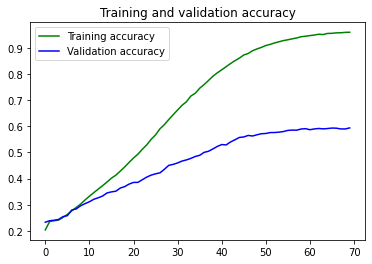

<Figure size 432x288 with 0 Axes>

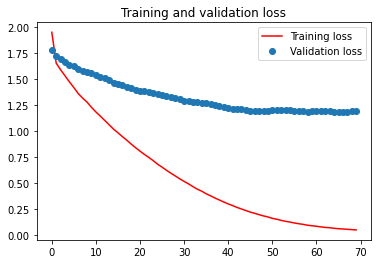

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig('wordA.png')
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'o', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.savefig('wordL.png')
plt.figure()
plt.show()

In [ ]:
model.save_weights('nmt_weights.h5')

In [ ]:
model.load_weights('nmt_weights.h5')

In [ ]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']
    
    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char
        
        # Exit condition: either hit max length or find stop token.
        if (sampled_char == '_END' or len(decoded_sentence) > 50):
            stop_condition = True
        
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        # Update states
        states_value = [h, c]
    
    return decoded_sentence

In [ ]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: tom wont do the same thing
Actual Assamese Translation:  টমে একে কাম নকৰে। 
Predicted Assamese Translation:  টমে একে কাম নকৰে। 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: i can run
Actual Assamese Translation:  মই দৌৰিব পাৰো। 
Predicted Assamese Translation:  মই দৌৰিব পাৰো। 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: take a bath
Actual Assamese Translation:  গা ধুব। 
Predicted Assamese Translation:  গা ধুব। 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: you look fat
Actual Assamese Translation:  আপোনাক শকত দেখাইছে। 
Predicted Assamese Translation:  আপোনাক শকত দেখাইছে। 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])


Input English sentence: she walks
Actual Assamese Translation:  তাই খোজ কাঢ়ে। 
Predicted Assamese Translation:  তাই খোজ কাঢ়ে। 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: whats going on here
Actual Assamese Translation:  ইয়াত কি চলি আছে 
Predicted Assamese Translation:  ইয়াত কি চলি আছে 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: i dont dream
Actual Assamese Translation:  মই সপোন নেচাও 
Predicted Assamese Translation:  মই সপোন নেচাও 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: put your helmet on
Actual Assamese Translation:  আপোনাৰ হেলমেট পিন্ধি দিয়ক। 
Predicted Assamese Translation:  আপোনাৰ হেলমেট পিন্ধি দিয়ক। 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: try on this sweater
Actual Assamese Translation:  এই চুৱেটাৰটো পিন্ধি চোৱা। 
Predicted Assamese Translation:  এই চুৱেটাৰটো পিন্ধি চোৱা। 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: i like tulips
Actual Assamese Translation:  মই টিউলিপ ভাল পাওঁ। 
Predicted Assamese Translation:  মই টিউলিপ ভাল পাওঁ। 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: i bought a red sports car
Actual Assamese Translation:  মই এখন ৰঙা স্পৰ্ট্‌ছ কাৰ কিনিলোঁ। 
Predicted Assamese Translation:  মই এখন ৰঙা স্পৰ্ট্‌ছ কাৰ কিনিছোঁ। 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: ill come to your place
Actual Assamese Translation:  মই তোমাৰ ঘৰলৈ যাম। 
Predicted Assamese Translation:  মই তোমাৰ তালৈ যাম। 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Assamese Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Assamese Translation:', decoded_sentence[:-4])

Input English sentence: what did it look like
Actual Assamese Translation:  দেখাত কিহৰ দৰে আছিল 
Predicted Assamese Translation:  দেখাত কিহৰ দৰে আছিল 
